# Fuel Combustion experiment

In [1]:
# Importing all the necessary modules to process our excel file
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import ExcelFile
from pandas import ExcelWriter
%matplotlib inline

In [24]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
%pwd

'/Volumes/UsbStorage/pyenv/chm_wisdom/Lecture 4.2- Supervised Learning Regressors (Student Folder)'

In [3]:
# First task is to import the raw Excel file for processing purpose
#Fuel here represent the molarmass of the Fuel
filename = r'Final_PAH_Data_Student_v3.xlsx'

initial_df = pd.read_excel(filename,sheet_name='Sheet1',index_col=0,skiprows=0,usecols="A:M")
initial_df

,Lf(mm),Fuel,Prim_MH_to_MC,Prim_H_to_C,Mixture,Sec_H_to_C,Sec_fuel_Percent,MC_Sec_Fuel,Total_H_to_C,PAH,GRPAH,Experiment_Num
S/No,,,,,,,,,,,,
1,1.243198,28,0.166667,2.0,16,4,0.00,0.0,2.00,696.493698,412.717406,Exp. 1
2,1.759619,28,0.166667,2.0,16,4,0.00,0.0,2.00,930.999998,495.480126,Exp. 1
3,2.240685,28,0.166667,2.0,16,4,0.00,0.0,2.00,1187.902926,572.576728,Exp. 1
4,2.757107,28,0.166667,2.0,16,4,0.00,0.0,2.00,1504.963994,655.339447,Exp. 1
5,3.238173,28,0.166667,2.0,16,4,0.00,0.0,2.00,1838.769810,732.436049,Exp. 1
...,...,...,...,...,...,...,...,...,...,...,...,...
654,5.763478,16,0.333333,4.0,2,10000,0.07,0.0,4.14,13.355160,6.625981,Exp. 57
655,6.275610,16,0.333333,4.0,2,10000,0.07,0.0,4.14,17.107886,8.029326,Exp. 57
656,6.752386,16,0.333333,4.0,2,10000,0.07,0.0,4.14,21.247527,9.335789,Exp. 57


In [4]:
# Identifiying columns with Nan Values
for cols in initial_df.columns:
    print(f'\t{cols:<17}: {initial_df[cols].isna().sum()} NaN Values')

	Lf(mm)           : 0 NaN Values
	Fuel             : 0 NaN Values
	Prim_MH_to_MC    : 0 NaN Values
	Prim_H_to_C      : 0 NaN Values
	Mixture          : 0 NaN Values
	Sec_H_to_C       : 0 NaN Values
	Sec_fuel_Percent : 0 NaN Values
	MC_Sec_Fuel      : 0 NaN Values
	Total_H_to_C     : 0 NaN Values
	PAH              : 0 NaN Values
	GRPAH            : 0 NaN Values
	Experiment_Num   : 0 NaN Values


In [5]:
initial_df.columns

Index(['Lf(mm)', 'Fuel', 'Prim_MH_to_MC', 'Prim_H_to_C', 'Mixture',
       'Sec_H_to_C', 'Sec_fuel_Percent', 'MC_Sec_Fuel', 'Total_H_to_C', 'PAH',
       'GRPAH', 'Experiment_Num'],
      dtype='object')

In [6]:
needed_df = initial_df[['Lf(mm)', 'Fuel', 'Prim_MH_to_MC', 'Prim_H_to_C',
       'Mixture', 'MC_Sec_Fuel','Total_H_to_C','PAH','GRPAH', 'Experiment_Num']]
needed_df

,Lf(mm),Fuel,Prim_MH_to_MC,Prim_H_to_C,Mixture,MC_Sec_Fuel,Total_H_to_C,PAH,GRPAH,Experiment_Num
S/No,,,,,,,,,,
1,1.243198,28,0.166667,2.0,16,0.0,2.00,696.493698,412.717406,Exp. 1
2,1.759619,28,0.166667,2.0,16,0.0,2.00,930.999998,495.480126,Exp. 1
3,2.240685,28,0.166667,2.0,16,0.0,2.00,1187.902926,572.576728,Exp. 1
4,2.757107,28,0.166667,2.0,16,0.0,2.00,1504.963994,655.339447,Exp. 1
5,3.238173,28,0.166667,2.0,16,0.0,2.00,1838.769810,732.436049,Exp. 1
...,...,...,...,...,...,...,...,...,...,...
654,5.763478,16,0.333333,4.0,2,0.0,4.14,13.355160,6.625981,Exp. 57
655,6.275610,16,0.333333,4.0,2,0.0,4.14,17.107886,8.029326,Exp. 57
656,6.752386,16,0.333333,4.0,2,0.0,4.14,21.247527,9.335789,Exp. 57


In [7]:
# Printing out the Entire Raw Excel Data for confirmation
needed_df = pd.DataFrame(needed_df)
#df = df.apply(pd.to_numeric, errors='coerce')
needed_df = needed_df.fillna(0)

#df.at[0:12,7:11] = np.round(df.loc[0:12,7:11],3)
needed_df

,Lf(mm),Fuel,Prim_MH_to_MC,Prim_H_to_C,Mixture,MC_Sec_Fuel,Total_H_to_C,PAH,GRPAH,Experiment_Num
S/No,,,,,,,,,,
1,1.243198,28,0.166667,2.0,16,0.0,2.00,696.493698,412.717406,Exp. 1
2,1.759619,28,0.166667,2.0,16,0.0,2.00,930.999998,495.480126,Exp. 1
3,2.240685,28,0.166667,2.0,16,0.0,2.00,1187.902926,572.576728,Exp. 1
4,2.757107,28,0.166667,2.0,16,0.0,2.00,1504.963994,655.339447,Exp. 1
5,3.238173,28,0.166667,2.0,16,0.0,2.00,1838.769810,732.436049,Exp. 1
...,...,...,...,...,...,...,...,...,...,...
654,5.763478,16,0.333333,4.0,2,0.0,4.14,13.355160,6.625981,Exp. 57
655,6.275610,16,0.333333,4.0,2,0.0,4.14,17.107886,8.029326,Exp. 57
656,6.752386,16,0.333333,4.0,2,0.0,4.14,21.247527,9.335789,Exp. 57


In [8]:
# Describe the Df
needed_df.describe()

,Lf(mm),Fuel,Prim_MH_to_MC,Prim_H_to_C,Mixture,MC_Sec_Fuel,Total_H_to_C,PAH,GRPAH
count,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000
mean,4.635456,34.164134,0.208376,2.500507,9.340426,2.576900,2.812361,5144.381616,1474.736761
std,1.888055,8.568666,0.049455,0.593456,6.997036,3.149325,0.599230,10726.740271,2556.747780
min,1.243198,16.000000,0.166667,2.000000,2.000000,0.000000,2.000000,0.578278,1.059184
25%,3.252817,28.000000,0.166667,2.000000,2.000000,0.000000,2.290000,140.442594,82.794833
50%,4.756371,30.000000,0.166667,2.000000,16.000000,0.000000,2.830000,603.990562,269.879783
75%,6.261701,42.000000,0.250000,3.000000,16.000000,5.400000,3.150000,3652.125250,1181.871935
max,7.769544,44.000000,0.333333,4.000000,16.000000,9.600000,4.400000,68329.872942,12585.385884


In [9]:
# Checking the datatypes
needed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 658 entries, 1 to 658
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lf(mm)          658 non-null    float64
 1   Fuel            658 non-null    int64  
 2   Prim_MH_to_MC   658 non-null    float64
 3   Prim_H_to_C     658 non-null    float64
 4   Mixture         658 non-null    int64  
 5   MC_Sec_Fuel     658 non-null    float64
 6   Total_H_to_C    658 non-null    float64
 7   PAH             658 non-null    float64
 8   GRPAH           658 non-null    float64
 9   Experiment_Num  658 non-null    object 
dtypes: float64(7), int64(2), object(1)
memory usage: 56.5+ KB


In [10]:
# Extracting the columns
list(needed_df.columns)

['Lf(mm)',
 'Fuel',
 'Prim_MH_to_MC',
 'Prim_H_to_C',
 'Mixture',
 'MC_Sec_Fuel',
 'Total_H_to_C',
 'PAH',
 'GRPAH',
 'Experiment_Num']

In [11]:
# Assigning he appropriate Datatypes
int_list = ['Fuel','Mixture']
for column in int_list:
    needed_df[column] = needed_df[column].astype('int16')
    
float_list = ['Lf(mm)','Prim_MH_to_MC','Prim_H_to_C','MC_Sec_Fuel','Total_H_to_C','PAH']
for column in float_list:
    needed_df[column] = needed_df[column].astype('float32')

category_list = ['Experiment_Num']
for column in category_list:
    needed_df[column] = needed_df[column].astype('category')
    
needed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 658 entries, 1 to 658
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Lf(mm)          658 non-null    float32 
 1   Fuel            658 non-null    int16   
 2   Prim_MH_to_MC   658 non-null    float32 
 3   Prim_H_to_C     658 non-null    float32 
 4   Mixture         658 non-null    int16   
 5   MC_Sec_Fuel     658 non-null    float32 
 6   Total_H_to_C    658 non-null    float32 
 7   PAH             658 non-null    float32 
 8   GRPAH           658 non-null    float64 
 9   Experiment_Num  658 non-null    category
dtypes: category(1), float32(6), float64(1), int16(2)
memory usage: 31.4 KB


In [14]:
#Excluding the non-numeric values to avoid errors when calculating the corr value

needed_df = needed_df[['Lf(mm)', 'Fuel', 'Prim_MH_to_MC', 'Prim_H_to_C',
       'Mixture', 'MC_Sec_Fuel','Total_H_to_C','PAH']]
needed_df

,Lf(mm),Fuel,Prim_MH_to_MC,Prim_H_to_C,Mixture,MC_Sec_Fuel,Total_H_to_C,PAH
S/No,,,,,,,,
1,1.243198,28,0.166667,2.0,16,0.0,2.00,696.493713
2,1.759619,28,0.166667,2.0,16,0.0,2.00,931.000000
3,2.240685,28,0.166667,2.0,16,0.0,2.00,1187.902954
4,2.757107,28,0.166667,2.0,16,0.0,2.00,1504.963989
5,3.238173,28,0.166667,2.0,16,0.0,2.00,1838.769775
...,...,...,...,...,...,...,...,...
654,5.763478,16,0.333333,4.0,2,0.0,4.14,13.355160
655,6.275609,16,0.333333,4.0,2,0.0,4.14,17.107885
656,6.752387,16,0.333333,4.0,2,0.0,4.14,21.247526


In [15]:
# Descriptions of the target column
needed_df["PAH"].describe()

count      658.000000
mean      5144.381348
std      10726.739258
min          0.578278
25%        140.442596
50%        603.990570
75%       3652.125305
max      68329.875000
Name: PAH, dtype: float64

In [16]:
# To find the correlation among
# the columns using pearson method
needed_df.corr(method ='pearson')

,Lf(mm),Fuel,Prim_MH_to_MC,Prim_H_to_C,Mixture,MC_Sec_Fuel,Total_H_to_C,PAH
Lf(mm),1.000000,-0.035710,0.113368,0.113368,-0.174055,-0.138855,0.103584,0.264378
Fuel,-0.035710,1.000000,-0.430037,-0.430037,0.133413,0.024778,-0.461671,0.343496
Prim_MH_to_MC,0.113368,-0.430037,1.000000,1.000000,-0.104386,-0.051028,0.898047,-0.385709
Prim_H_to_C,0.113368,-0.430037,1.000000,1.000000,-0.104386,-0.051028,0.898047,-0.385709
Mixture,-0.174055,0.133413,-0.104386,-0.104386,1.000000,0.779961,0.023220,-0.022269
MC_Sec_Fuel,-0.138855,0.024778,-0.051028,-0.051028,0.779961,1.000000,0.242672,-0.142470
Total_H_to_C,0.103584,-0.461671,0.898047,0.898047,0.023220,0.242672,1.000000,-0.472044
PAH,0.264378,0.343496,-0.385709,-0.385709,-0.022269,-0.142470,-0.472044,1.000000


In [17]:
# To find the correlation among
# the columns using kendall method
needed_df.corr(method ='kendall')

,Lf(mm),Fuel,Prim_MH_to_MC,Prim_H_to_C,Mixture,MC_Sec_Fuel,Total_H_to_C,PAH
Lf(mm),1.000000,-0.010749,0.056950,0.056950,-0.148113,-0.111276,0.048764,0.190991
Fuel,-0.010749,1.000000,0.005870,0.005870,0.121702,0.033828,-0.065779,0.158192
Prim_MH_to_MC,0.056950,0.005870,1.000000,1.000000,-0.008658,0.031179,0.744296,-0.639414
Prim_H_to_C,0.056950,0.005870,1.000000,1.000000,-0.008658,0.031179,0.744296,-0.639414
Mixture,-0.148113,0.121702,-0.008658,-0.008658,1.000000,0.733017,0.092638,0.039856
MC_Sec_Fuel,-0.111276,0.033828,0.031179,0.031179,0.733017,1.000000,0.283041,-0.070198
Total_H_to_C,0.048764,-0.065779,0.744296,0.744296,0.092638,0.283041,1.000000,-0.637223
PAH,0.190991,0.158192,-0.639414,-0.639414,0.039856,-0.070198,-0.637223,1.000000


In [17]:
needed_df.shape

(658, 8)

In [18]:
#To determine what kind of model is required for this Analysis/problem, we need to count the number of unique values in our 
# output target (PAH) and then
possible_output = needed_df['PAH'].nunique() #NO of possible output(PAH)
possible_output
#OR
#len(set(needed_df['PAH']))

644

In [19]:
# To calculate the ratio to the number of ROW to the number of possible out put
ratio = possible_output / needed_df.shape[0]
ratio # When ratio is greater than 5% use regression,  when its less than < 5% use Classification

0.9787234042553191

In [20]:
needed_df.columns

Index(['Lf(mm)', 'Fuel', 'Prim_MH_to_MC', 'Prim_H_to_C', 'Mixture',
       'MC_Sec_Fuel', 'Total_H_to_C', 'PAH'],
      dtype='object')

In [20]:
from sklearn.linear_model import HuberRegressor, TheilSenRegressor, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

#r2 is the co-efficient of correlation, a good metric for Regression models

In [21]:
data_df = needed_df.copy()
data_df

,Lf(mm),Fuel,Prim_MH_to_MC,Prim_H_to_C,Mixture,MC_Sec_Fuel,Total_H_to_C,PAH
S/No,,,,,,,,
1,1.243198,28,0.166667,2.0,16,0.0,2.00,696.493713
2,1.759619,28,0.166667,2.0,16,0.0,2.00,931.000000
3,2.240685,28,0.166667,2.0,16,0.0,2.00,1187.902954
4,2.757107,28,0.166667,2.0,16,0.0,2.00,1504.963989
5,3.238173,28,0.166667,2.0,16,0.0,2.00,1838.769775
...,...,...,...,...,...,...,...,...
654,5.763478,16,0.333333,4.0,2,0.0,4.14,13.355160
655,6.275609,16,0.333333,4.0,2,0.0,4.14,17.107885
656,6.752387,16,0.333333,4.0,2,0.0,4.14,21.247526


In [22]:
## Understanding which features are very important for prediction

min_max = MinMaxScaler()
standard = StandardScaler()
robust = RobustScaler()

#fit _transorm for the X-train data
X_train = min_max.fit_transform(X_train)
X_train

#transform only on test data, Dont Fit 
X_test = min_max.transform(X_test)
X_test

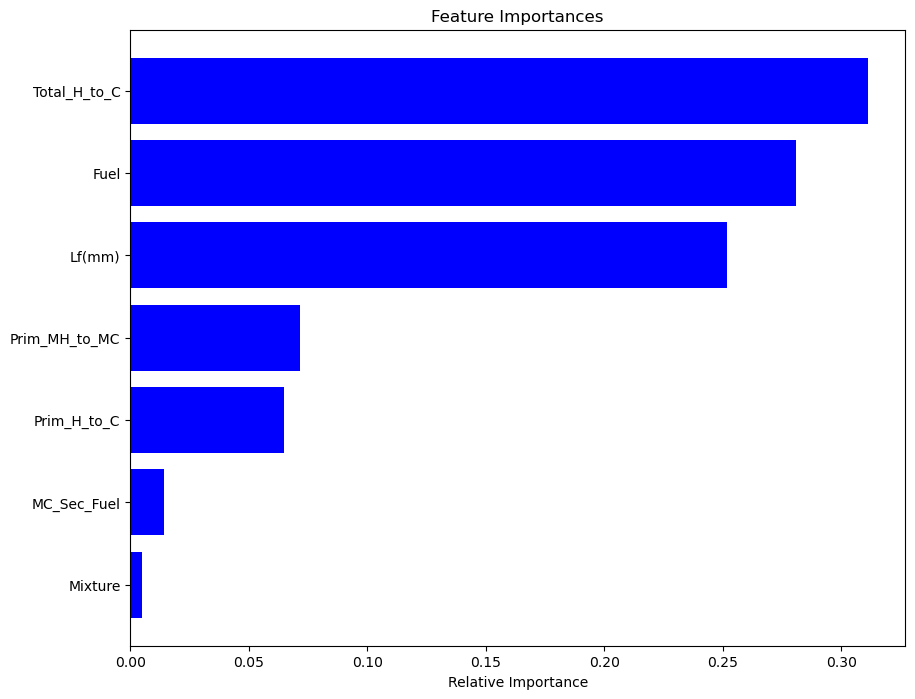

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
# Spliiting data into test and train sets
# X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
                                        data_df.drop(['PAH'], axis=1), data_df['PAH'], test_size=0.20, random_state=0)

# Scale the data
min_max = MinMaxScaler()
X_train = min_max.fit_transform(X_train)
X_test = min_max.transform(X_test)

# fitting the model
model = ExtraTreesRegressor(n_estimators=500, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

# plotting feature importances
features = data_df.drop('PAH', axis = 1).columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,8)) 
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [57]:
data_df

,Lf(mm),Fuel,Prim_MH_to_MC,Prim_H_to_C,Mixture,MC_Sec_Fuel,Total_H_to_C,PAH
S/No,,,,,,,,
1,1.243198,28,0.166667,2.0,16,0.0,2.00,696.493713
2,1.759619,28,0.166667,2.0,16,0.0,2.00,931.000000
3,2.240685,28,0.166667,2.0,16,0.0,2.00,1187.902954
4,2.757107,28,0.166667,2.0,16,0.0,2.00,1504.963989
5,3.238173,28,0.166667,2.0,16,0.0,2.00,1838.769775
...,...,...,...,...,...,...,...,...
654,5.763478,16,0.333333,4.0,2,0.0,4.14,13.355160
655,6.275609,16,0.333333,4.0,2,0.0,4.14,17.107885
656,6.752387,16,0.333333,4.0,2,0.0,4.14,21.247526


In [55]:
data_df

,Lf(mm),Fuel,Prim_MH_to_MC,Prim_H_to_C,Mixture,MC_Sec_Fuel,Total_H_to_C,PAH
S/No,,,,,,,,
1,1.243198,28,0.166667,2.0,16,0.0,2.00,696.493713
2,1.759619,28,0.166667,2.0,16,0.0,2.00,931.000000
3,2.240685,28,0.166667,2.0,16,0.0,2.00,1187.902954
4,2.757107,28,0.166667,2.0,16,0.0,2.00,1504.963989
5,3.238173,28,0.166667,2.0,16,0.0,2.00,1838.769775
...,...,...,...,...,...,...,...,...
654,5.763478,16,0.333333,4.0,2,0.0,4.14,13.355160
655,6.275609,16,0.333333,4.0,2,0.0,4.14,17.107885
656,6.752387,16,0.333333,4.0,2,0.0,4.14,21.247526


In [58]:
# Extracting the independent features
#This is my X
data_dfX = (data_df[['Lf(mm)', 'Fuel', 'Prim_MH_to_MC',
       'MC_Sec_Fuel', 'Total_H_to_C']])

In [59]:
#featrues

data_dfX

,Lf(mm),Fuel,Prim_MH_to_MC,MC_Sec_Fuel,Total_H_to_C
S/No,,,,,
1,1.243198,28,0.166667,0.0,2.00
2,1.759619,28,0.166667,0.0,2.00
3,2.240685,28,0.166667,0.0,2.00
4,2.757107,28,0.166667,0.0,2.00
5,3.238173,28,0.166667,0.0,2.00
...,...,...,...,...,...
654,5.763478,16,0.333333,0.0,4.14
655,6.275609,16,0.333333,0.0,4.14
656,6.752387,16,0.333333,0.0,4.14


In [61]:
#target
#This is my y

data_df['PAH']

S/No
1       696.493713
2       931.000000
3      1187.902954
4      1504.963989
5      1838.769775
          ...     
654      13.355160
655      17.107885
656      21.247526
657      26.388033
658      31.944530
Name: PAH, Length: 658, dtype: float32

In [ ]:
#train_X, test_X, train_y, test_y = train_test_split(data_dfX, data_df['PAH'],test_size=0.3,random_state=0)

In [64]:
# Deriving the model equation

X_features = data_dfX.copy()   #X
y_values = data_df['PAH'].copy() #y

# Scale the data
min_max = MinMaxScaler()
X_train = min_max.fit_transform(X_train)
X_test = min_max.transform(X_test)

In [32]:
#reg.score(test_X,test_y)

In [65]:
train_X = X_features[0:441]
train_y = y_values[0:441]
train_X, train_y

(        Lf(mm)  Fuel  Prim_MH_to_MC  MC_Sec_Fuel  Total_H_to_C
 S/No                                                          
 1     1.243198    28       0.166667          0.0      2.000000
 2     1.759619    28       0.166667          0.0      2.000000
 3     2.240685    28       0.166667          0.0      2.000000
 4     2.757107    28       0.166667          0.0      2.000000
 5     3.238173    28       0.166667          0.0      2.000000
 ...        ...   ...            ...          ...           ...
 437   4.239950    30       0.250000          7.2      3.428571
 438   4.756371    30       0.250000          7.2      3.428571
 439   5.247792    30       0.250000          7.2      3.428571
 440   5.774569    30       0.250000          7.2      3.428571
 441   6.265990    30       0.250000          7.2      3.428571
 
 [441 rows x 5 columns],
 S/No
 1       696.493713
 2       931.000000
 3      1187.902954
 4      1504.963989
 5      1838.769775
           ...     
 437     258.59

In [66]:
test_X = X_features[441:658]
test_y = y_values[441:658]
test_X,test_y

(        Lf(mm)  Fuel  Prim_MH_to_MC  MC_Sec_Fuel  Total_H_to_C
 S/No                                                          
 442   1.243198    28       0.166667          0.0          2.00
 443   1.759619    28       0.166667          0.0          2.00
 444   2.265685    28       0.166667          0.0          2.00
 445   2.746752    28       0.166667          0.0          2.00
 446   3.263173    28       0.166667          0.0          2.00
 ...        ...   ...            ...          ...           ...
 654   5.763478    16       0.333333          0.0          4.14
 655   6.275609    16       0.333333          0.0          4.14
 656   6.752387    16       0.333333          0.0          4.14
 657   7.264518    16       0.333333          0.0          4.14
 658   7.751650    16       0.333333          0.0          4.14
 
 [217 rows x 5 columns],
 S/No
 442     655.583374
 443     884.130371
 444    1145.398193
 445    1427.994019
 446    1768.495117
           ...     
 654      13.35

In [67]:
# Scale the data with MinMax Scaler
min_max = MinMaxScaler()
train_X_minmax = min_max.fit_transform(train_X)
test_X_minmax = min_max.transform(test_X)

In [37]:
## Runing all the available regressors on the train and test

In [69]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,r2_score,max_error

In [70]:
from time import time

from sklearn.linear_model import LinearRegression, RANSACRegressor,Ridge,Lasso, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,BaggingRegressor 
from sklearn.ensemble import AdaBoostRegressor, VotingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [71]:
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
regressors = [
    SGDRegressor(),
    RANSACRegressor(),
    KNeighborsRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge(),
    ExtraTreesRegressor(),
    BaggingRegressor(estimator=ExtraTreesRegressor()),
    GradientBoostingRegressor(learning_rate=0.3),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    BaggingRegressor(estimator=RandomForestRegressor()),
    GradientBoostingRegressor(),
    BaggingRegressor(estimator=GradientBoostingRegressor()),
    AdaBoostRegressor(),
    KNeighborsRegressor(),
    VotingRegressor([("gb", reg1), ("rf", reg2)])
    
]

In [72]:
#Creating a ML performance DataFrame
performance_df = pd.DataFrame(columns = ['train_time', "pred_time", "train_score", "test_score", "ml_model"])

In [83]:
head = 15
for model in regressors[:head]:
    start = time()
    model.fit(train_X_minmax, train_y)
    train_score = model.score(train_X_minmax, train_y)
    train_time = time() - start
    mx = float(97/100)
    start = time()
    for num in range(10):
        y_pred = model.predict(test_X_minmax)
        test_score = r2_score(test_y, y_pred)
        if(test_score > mx):
            mx = test_score
            print(mx)
    #start = time()
    #y_pred = model.predict(test_X)
    predict_time = time()-start 
    performance_df.loc[regressors.index(model)] = [train_time, predict_time, train_score, test_score, str(model)]
    if(test_score>0.96):
        print(model)
        print("\tTraining time: %0.3fs" % train_time)
        print("\tPrediction time: %0.3fs" % predict_time)
        print("\tExplained variance:", explained_variance_score(test_y, y_pred))
        print("\tMean absolute error:", mean_absolute_error(test_y, y_pred))
        print("\tMean squared error:", mean_squared_error(test_y,y_pred))
        print("\tR2 training score:", model.score(train_X_minmax, train_y))
        print("\tR2 test score:", r2_score(test_y, y_pred))
        print("\tR2 Maximum Error:", max_error(test_y, y_pred))
        print()
print('Simulation Completed')

0.9749706236398551
ExtraTreesRegressor()
	Training time: 0.061s
	Prediction time: 0.035s
	Explained variance: 0.9750502879907263
	Mean absolute error: 715.9134229802509
	Mean squared error: 2568491.2843446163
	R2 training score: 1.0
	R2 test score: 0.9749706236398551
	R2 Maximum Error: 8129.414804687498

0.9758084403580976
BaggingRegressor(estimator=ExtraTreesRegressor())
	Training time: 0.475s
	Prediction time: 0.299s
	Explained variance: 0.9758543390212319
	Mean absolute error: 669.7542416431304
	Mean squared error: 2482515.313240894
	R2 training score: 0.9993285080374692
	R2 test score: 0.9758084403580976
	R2 Maximum Error: 9487.91043164063

Simulation Completed


In [84]:
performance_df.sort_values(by=['train_score', 'test_score'], ascending=False)

,train_time,pred_time,train_score,test_score,ml_model
6,0.060519,0.034883,1.000000,0.974971,ExtraTreesRegressor()
9,0.001062,0.000973,1.000000,0.920208,DecisionTreeRegressor()
7,0.475367,0.299443,0.999329,0.975808,BaggingRegressor(estimator=ExtraTreesRegressor())
8,0.020374,0.002289,0.998598,0.870030,GradientBoostingRegressor(learning_rate=0.3)
10,0.071495,0.029939,0.998216,0.934761,RandomForestRegressor()
12,0.020528,0.002351,0.994649,0.881326,GradientBoostingRegressor()
13,0.167327,0.016769,0.992467,0.877814,BaggingRegressor(estimator=GradientBoostingReg...
11,0.584340,0.268566,0.992195,0.923534,BaggingRegressor(estimator=RandomForestRegress...
2,0.003113,0.005897,0.972106,0.927053,KNeighborsRegressor()
14,0.023089,0.012522,0.951341,0.875205,AdaBoostRegressor()


In [85]:
#We chose ExtraTreesRegressor and BaggingRegressor(estimator=ExtraTreesRegressor()) based on the train and test scores
#Bias -- ExtraTree has "Low Bias"(High Train score)
#Variance is "Low Variance" when the "Test score is very high"
#Under fitting == Very Low Train score w/wo low test score 
#Over fitting == Very High Train score but Low test score
#Good Model === Low Bias, Low Variance 

better_model = ExtraTreesRegressor(n_jobs=-1,random_state=None)
best_model = BaggingRegressor(estimator=ExtraTreesRegressor()) 
best_regressors = [
    better_model,
    best_model]
head = 2
for model in best_regressors[:head]:
    start = time()
    model.fit(train_X_minmax, train_y)
    train_time = time() - start
    mx = float(970/1000)
    start = time()
    while(mx <= 0.970):
        y_pred = model.predict(test_X_minmax)
        predict_time = time()-start
        test_score = r2_score(test_y, y_pred)
        if(test_score > mx):
            mx = test_score
            print(mx)    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(test_y, y_pred))
    print("\tMean absolute error:", mean_absolute_error(test_y, y_pred))
    print("\tMean squared error:", mean_squared_error(test_y,y_pred))
    print("\tR2 training score:", model.score(train_X_minmax, train_y))
    print("\tR2 test score:", r2_score(test_y, y_pred))
    print()
print('Simulation Completed')

0.9761692836812382
ExtraTreesRegressor(n_jobs=-1)
	Training time: 0.087s
	Prediction time: 0.007s
	Explained variance: 0.9761715043293602
	Mean absolute error: 651.5684502992899
	Mean squared error: 2445485.907587125
	R2 training score: 1.0
	R2 test score: 0.9761692836812382

0.9764524434928047
BaggingRegressor(estimator=ExtraTreesRegressor())
	Training time: 0.444s
	Prediction time: 0.031s
	Explained variance: 0.9764960090611574
	Mean absolute error: 659.3023920014717
	Mean squared error: 2416428.311519994
	R2 training score: 0.9988869886721852
	R2 test score: 0.9764524434928047

Simulation Completed


In [86]:
better_model.get_params(deep=True)

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [87]:
BaggingRegressor(base_estimator=ExtraTreesRegressor()).get_params(deep=True)

{'base_estimator__bootstrap': False,
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__criterion': 'squared_error',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': 1.0,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__max_samples': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__n_estimators': 100,
 'base_estimator__n_jobs': None,
 'base_estimator__oob_score': False,
 'base_estimator__random_state': None,
 'base_estimator__verbose': 0,
 'base_estimator__warm_start': False,
 'base_estimator': ExtraTreesRegressor(),
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [88]:
ExtraTreesRegressor().get_params(deep=True)

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [91]:
# Runing iterations to get best R2 score
param=[]
best_regress = ExtraTreesRegressor(n_jobs=-1,random_state=None)
best_mx = float(970/1000)

while(best_mx <= 0.985):
    start = time()
    best_regress.fit(train_X_minmax,train_y)
    train_time = time() - start
    start = time()
    y_pred = best_regress.predict(test_X_minmax)
    test_score = r2_score(test_y, y_pred)
    # print(test_score)
    if(test_score > best_mx):
        best_mx = test_score
        print(best_mx)
    predict_time = time()-start 

print(best_regress)
print("\tTraining time= %0.3fs" % train_time)
print("\tPrediction time= %0.3fs" % predict_time)
print("\tExplained variance=", explained_variance_score(test_y, y_pred))
print("\tMean absolute error=", mean_absolute_error(test_y, y_pred))
print("\tMean squared error=", mean_squared_error(test_y,y_pred))
print("\tR2 training score=", best_regress.score(train_X_minmax, train_y))
#rint("\tR2 test score=", r2_score(test_y, y_pred))
print("\tR2 test score=", best_mx)
print("\tR2 Maximum Error:", max_error(test_y, y_pred))

print()



0.9754580536153901
0.9807940275941567
0.9816411298380913
0.9836065279914387
0.9849345755748851
0.9851005007416558
ExtraTreesRegressor(n_jobs=-1)
	Training time= 0.040s
	Prediction time= 0.005s
	Explained variance= 0.98512133392956
	Mean absolute error= 511.9074913989785
	Mean squared error= 1528972.7332996393
	R2 training score= 1.0
	R2 test score= 0.9851005007416558
	R2 Maximum Error: 6869.0126953125



In [92]:
best_regress.get_params(deep=True)

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [93]:
best_score = str(round(best_mx*10000))
best_score

'9851'

In [94]:
import pickle

# Saving the best regressor as a pickle file
best_score = str(round(best_mx*10000))
model_name = "best_regress_" + best_score +".pkl"
pickle.dump(best_regress, open(model_name, 'wb')) # stored as binary file
model_name

'best_regress_9851.pkl'

In [95]:
import pickle

# Importing the best regressor as a pickle file
model_name = 'best_regress_9851.pkl'
pickled_model = pickle.load(open(model_name, 'rb')) # read as binary file


In [96]:
pickled_model

ExtraTreesRegressor(n_jobs=-1)

In [99]:
test_X

,Lf(mm),Fuel,Prim_MH_to_MC,MC_Sec_Fuel,Total_H_to_C
S/No,,,,,
442,1.243198,28,0.166667,0.0,2.00
443,1.759619,28,0.166667,0.0,2.00
444,2.265685,28,0.166667,0.0,2.00
445,2.746752,28,0.166667,0.0,2.00
446,3.263173,28,0.166667,0.0,2.00
...,...,...,...,...,...
654,5.763478,16,0.333333,0.0,4.14
655,6.275609,16,0.333333,0.0,4.14
656,6.752387,16,0.333333,0.0,4.14


In [101]:
import warnings
warnings.filterwarnings('ignore')

In [102]:
test_X['PAH'] = test_y
test_X['Pred_PAH'] = y_pred
test_X

,Lf(mm),Fuel,Prim_MH_to_MC,MC_Sec_Fuel,Total_H_to_C,PAH,Pred_PAH
S/No,,,,,,,
442,1.243198,28,0.166667,0.0,2.00,655.583374,696.493713
443,1.759619,28,0.166667,0.0,2.00,884.130371,931.000000
444,2.265685,28,0.166667,0.0,2.00,1145.398193,1172.842128
445,2.746752,28,0.166667,0.0,2.00,1427.994019,1462.598093
446,3.263173,28,0.166667,0.0,2.00,1768.495117,1812.131420
...,...,...,...,...,...,...,...
654,5.763478,16,0.333333,0.0,4.14,13.355160,14.559667
655,6.275609,16,0.333333,0.0,4.14,17.107885,17.941596
656,6.752387,16,0.333333,0.0,4.14,21.247526,22.414011


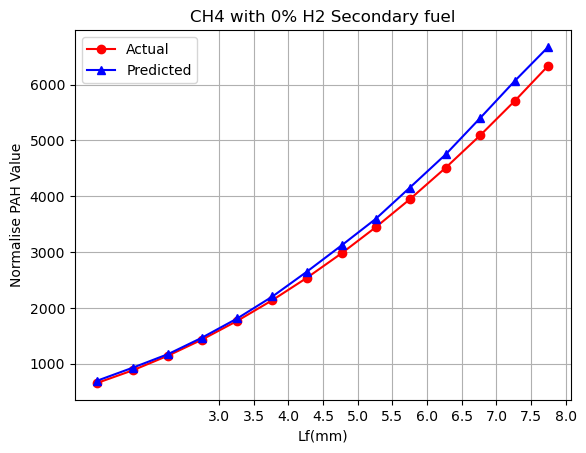

In [103]:
# Plotting Graphs for Methane(CH4) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][0:14]
y_actual = test_X['PAH'][0:14]
y_pred = test_X['Pred_PAH'][0:14]

axes.set_title('CH4 with 0% H2 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()




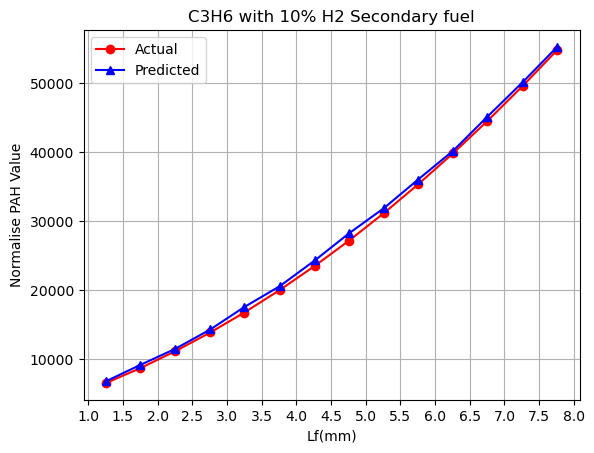

In [105]:
# Plotting Graphs for Propene(C3H8) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][14:28]
y_actual = test_X['PAH'][14:28]
y_pred = test_X['Pred_PAH'][14:28]

axes.set_title('C3H6 with 10% H2 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

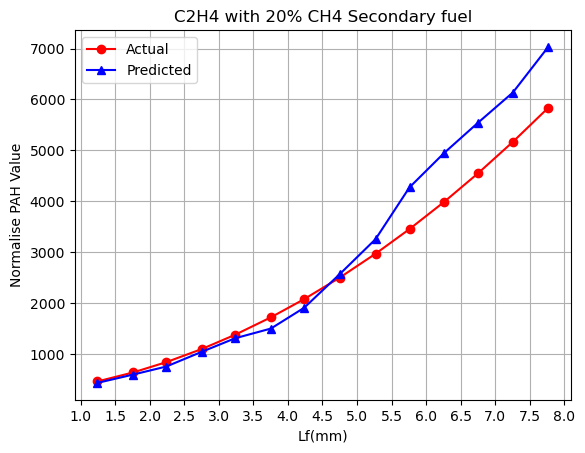

In [106]:
# Plotting Graphs for Ethene(C2H4) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][28:42]
y_actual = test_X['PAH'][28:42]
y_pred = test_X['Pred_PAH'][28:42]

axes.set_title('C2H4 with 20% CH4 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

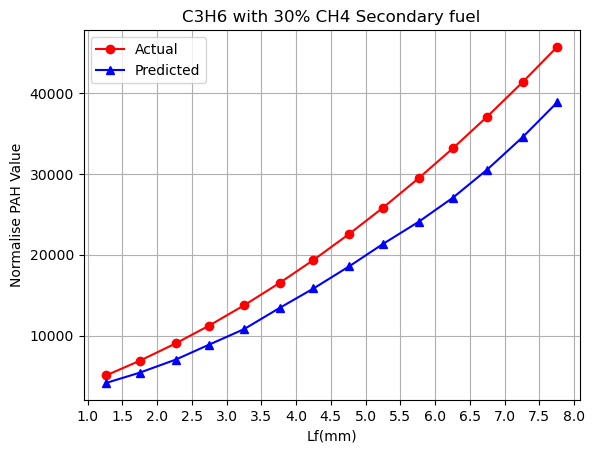

In [107]:
# Plotting Graphs for Ethane(C2H6) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][42:56]
y_actual = test_X['PAH'][42:56]
y_pred = test_X['Pred_PAH'][42:56]

axes.set_title('C3H6 with 30% CH4 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

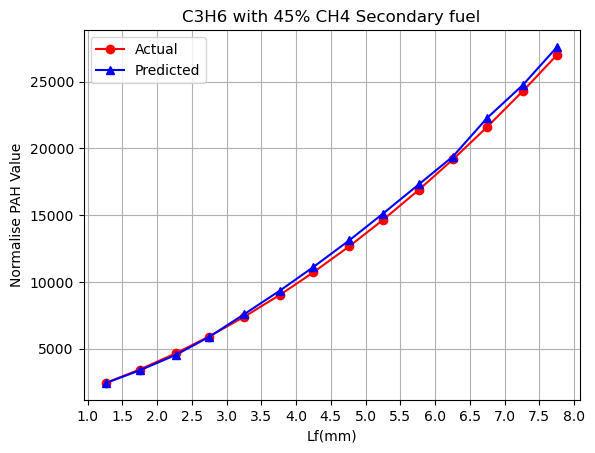

In [108]:
# Plotting Graphs for Ethane(C2H6) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][56:70]
y_actual = test_X['PAH'][56:70]
y_pred = test_X['Pred_PAH'][56:70]

axes.set_title('C3H6 with 45% CH4 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

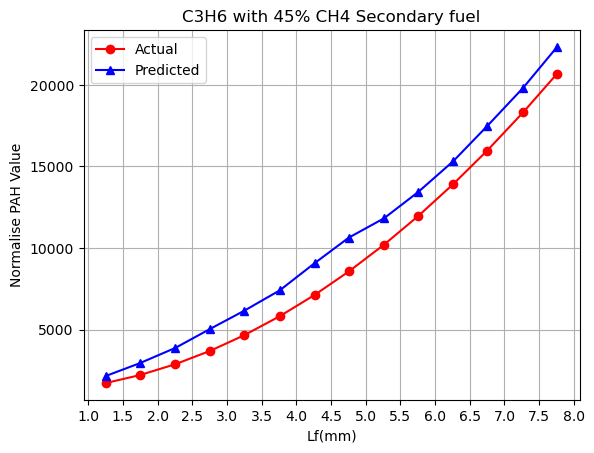

In [109]:
# Plotting Graphs for Ethane(C2H6) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][70:84]
y_actual = test_X['PAH'][70:84]
y_pred = test_X['Pred_PAH'][70:84]

axes.set_title('C3H6 with 45% CH4 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

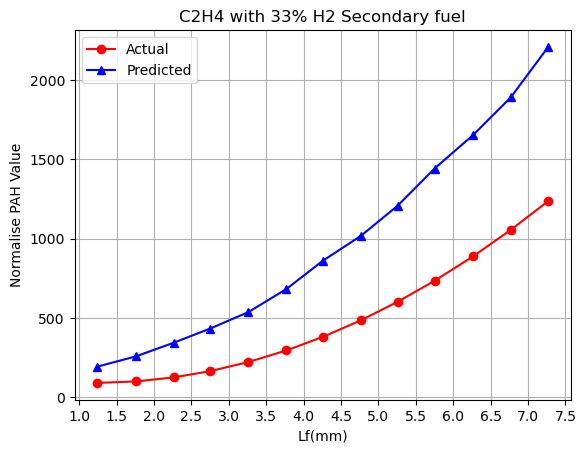

In [110]:
# Plotting Graphs for Ethene(C2H4) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][84:97]
y_actual = test_X['PAH'][84:97]
y_pred = test_X['Pred_PAH'][84:97]

axes.set_title('C2H4 with 33% H2 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

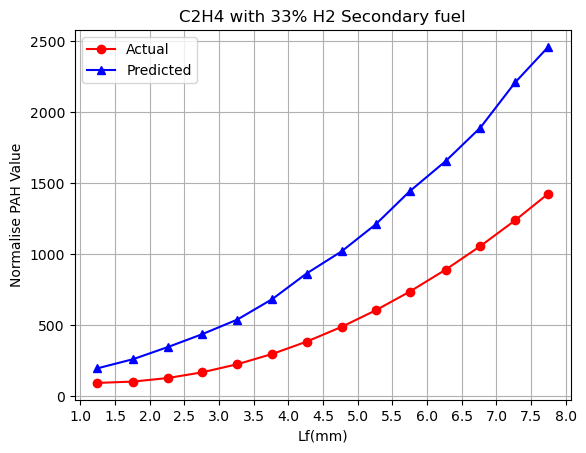

In [111]:
# Plotting Graphs for Ethene(C2H4) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][84:98]
y_actual = test_X['PAH'][84:98]
y_pred = test_X['Pred_PAH'][84:98]

axes.set_title('C2H4 with 33% H2 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

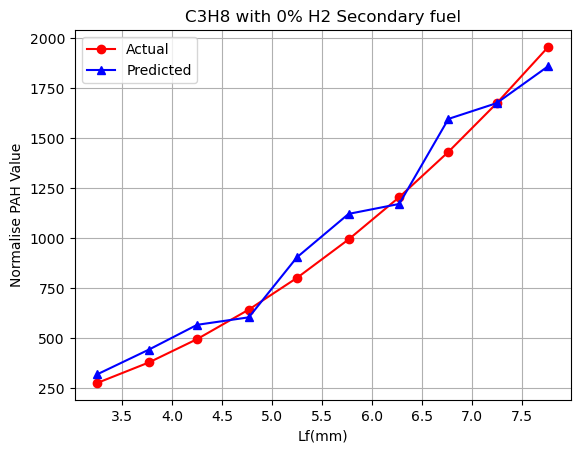

In [112]:
# Plotting Graphs for Ethene(C2H4) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][98:108]
y_actual = test_X['PAH'][98:108]
y_pred = test_X['Pred_PAH'][98:108]

axes.set_title('C3H8 with 0% H2 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

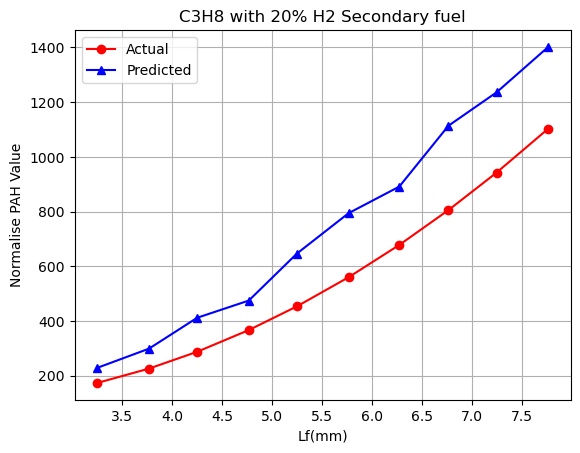

In [113]:
# Plotting Graphs for Ethene(C2H4) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][108:118]
y_actual = test_X['PAH'][108:118]
y_pred = test_X['Pred_PAH'][108:118]

axes.set_title('C3H8 with 20% H2 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

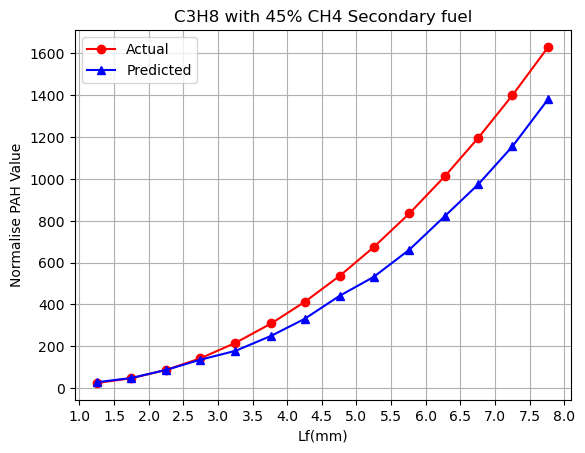

In [114]:
# Plotting Graphs for Ethene(C2H4) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][118:132]
y_actual = test_X['PAH'][118:132]
y_pred = test_X['Pred_PAH'][118:132]

axes.set_title('C3H8 with 45% CH4 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

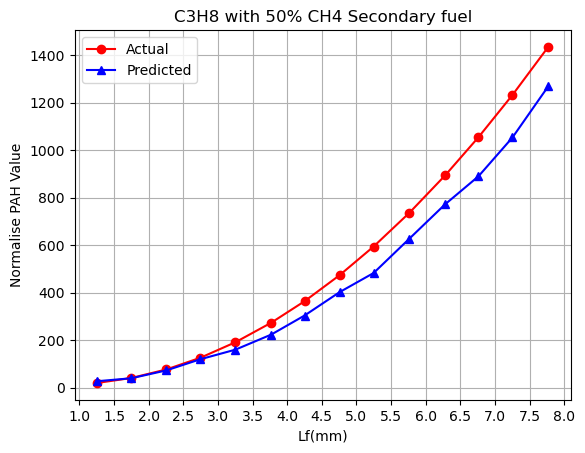

In [115]:
# Plotting Graphs for Ethene(C2H4) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][132:146]
y_actual = test_X['PAH'][132:146]
y_pred = test_X['Pred_PAH'][132:146]

axes.set_title('C3H8 with 50% CH4 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

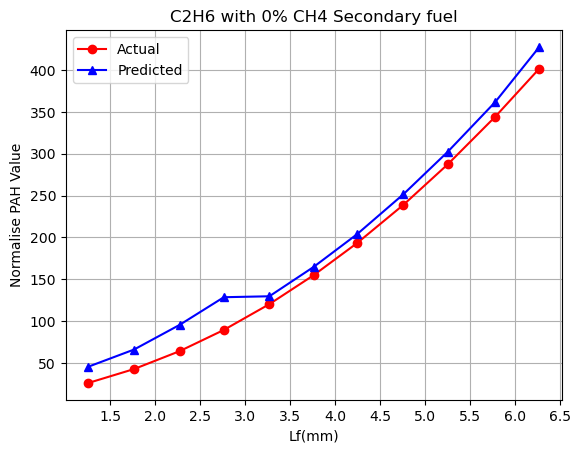

In [116]:
# Plotting Graphs for Ethane(C2H6) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][146:157]
y_actual = test_X['PAH'][146:157]
y_pred = test_X['Pred_PAH'][146:157]

axes.set_title('C2H6 with 0% CH4 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

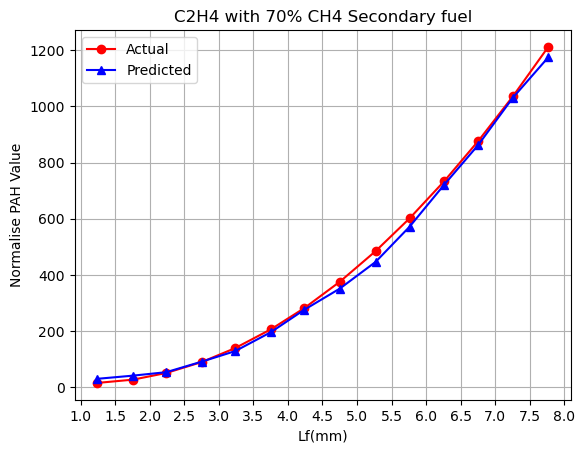

In [117]:
# Plotting Graphs for Ethene(C2H4) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][157:171]
y_actual = test_X['PAH'][157:171]
y_pred = test_X['Pred_PAH'][157:171]

axes.set_title('C2H4 with 70% CH4 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

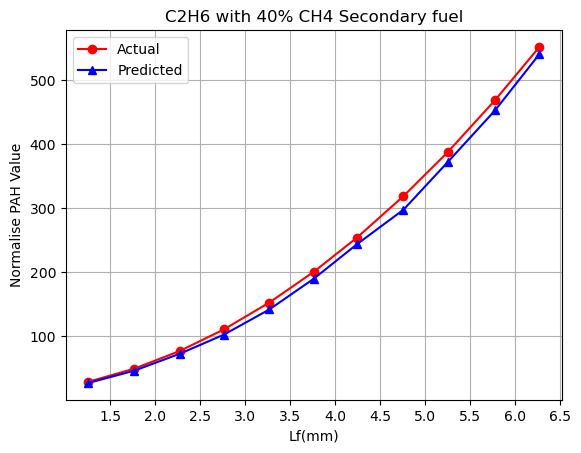

In [118]:
# Plotting Graphs for Ethane(C2H6) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][171:182]
y_actual = test_X['PAH'][171:182]
y_pred = test_X['Pred_PAH'][171:182]

axes.set_title('C2H6 with 40% CH4 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

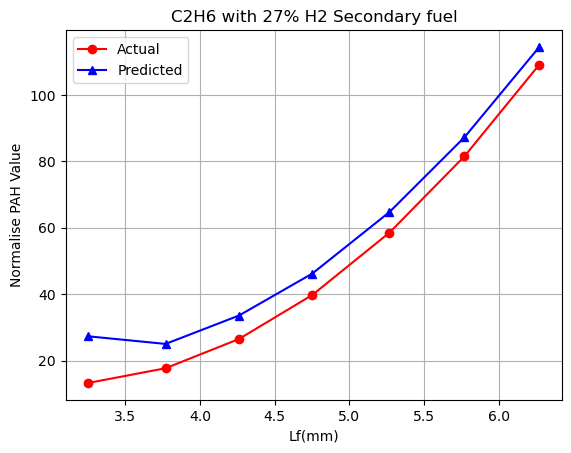

In [119]:
# Plotting Graphs for Ethane(C2H6) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][182:189]
y_actual = test_X['PAH'][182:189]
y_pred = test_X['Pred_PAH'][182:189]

axes.set_title('C2H6 with 27% H2 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

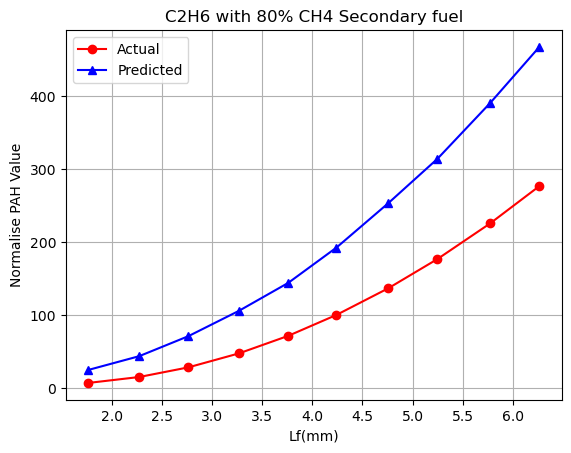

In [120]:
# Plotting Graphs for Ethane(C2H6) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][189:199]
y_actual = test_X['PAH'][189:199]
y_pred = test_X['Pred_PAH'][189:199]

axes.set_title('C2H6 with 80% CH4 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

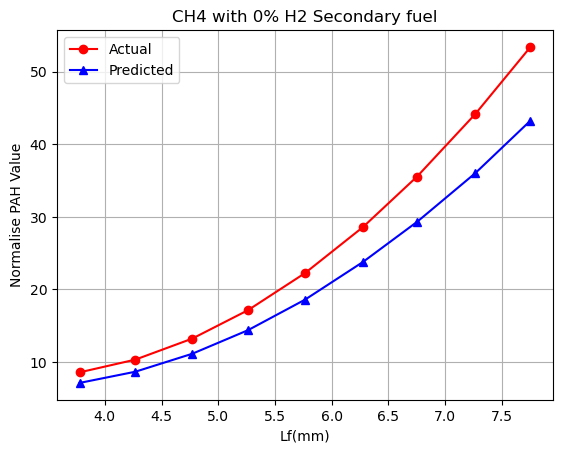

In [121]:
# Plotting Graphs for Methane(CH4) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][199:208]
y_actual = test_X['PAH'][199:208]
y_pred = test_X['Pred_PAH'][199:208]

axes.set_title('CH4 with 0% H2 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()




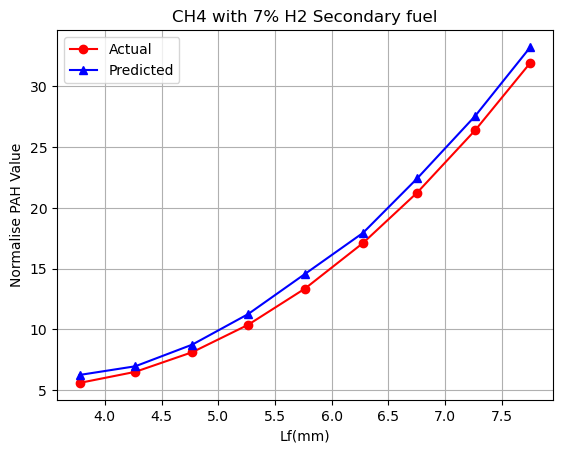

In [122]:
# Plotting Graphs for Methane(CH4) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][208:217]
y_actual = test_X['PAH'][208:217]
y_pred = test_X['Pred_PAH'][208:217]

axes.set_title('CH4 with 7% H2 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()


In [123]:
#Getting the entire dataframe of the test features
test_X

,Lf(mm),Fuel,Prim_MH_to_MC,MC_Sec_Fuel,Total_H_to_C,PAH,Pred_PAH
S/No,,,,,,,
442,1.243198,28,0.166667,0.0,2.00,655.583374,696.493713
443,1.759619,28,0.166667,0.0,2.00,884.130371,931.000000
444,2.265685,28,0.166667,0.0,2.00,1145.398193,1172.842128
445,2.746752,28,0.166667,0.0,2.00,1427.994019,1462.598093
446,3.263173,28,0.166667,0.0,2.00,1768.495117,1812.131420
...,...,...,...,...,...,...,...
654,5.763478,16,0.333333,0.0,4.14,13.355160,14.559667
655,6.275609,16,0.333333,0.0,4.14,17.107885,17.941596
656,6.752387,16,0.333333,0.0,4.14,21.247526,22.414011


In [124]:
# Extracting the column headings of the test dataframe
list(test_X.columns)

['Lf(mm)',
 'Fuel',
 'Prim_MH_to_MC',
 'MC_Sec_Fuel',
 'Total_H_to_C',
 'PAH',
 'Pred_PAH']

In [128]:
# Creating an empty dataframe for combining the output
test_output_df = pd.DataFrame(test_X)

In [129]:
test_output_df

,Lf(mm),Fuel,Prim_MH_to_MC,MC_Sec_Fuel,Total_H_to_C,PAH,Pred_PAH
S/No,,,,,,,
442,1.243198,28,0.166667,0.0,2.00,655.583374,696.493713
443,1.759619,28,0.166667,0.0,2.00,884.130371,931.000000
444,2.265685,28,0.166667,0.0,2.00,1145.398193,1172.842128
445,2.746752,28,0.166667,0.0,2.00,1427.994019,1462.598093
446,3.263173,28,0.166667,0.0,2.00,1768.495117,1812.131420
...,...,...,...,...,...,...,...
654,5.763478,16,0.333333,0.0,4.14,13.355160,14.559667
655,6.275609,16,0.333333,0.0,4.14,17.107885,17.941596
656,6.752387,16,0.333333,0.0,4.14,21.247526,22.414011


In [130]:
# Exporting Results
test_output_df.to_excel('Initial_PAH_Test_Results.xlsx')